In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

diab = pd.read_csv("d:/data/diabetes.csv")
diab = diab.loc[:, ["Age", "Glucose"]]

In [2]:
diab.head()

,Age,Glucose
0,50,148
1,31,85
2,32,183
3,21,89
4,33,137


In [3]:
diab.describe()

,Age,Glucose
count,768.000000,768.000000
mean,33.240885,120.894531
std,11.760232,31.972618
min,21.000000,0.000000
25%,24.000000,99.000000
50%,29.000000,117.000000
75%,41.000000,140.250000
max,81.000000,199.000000


In [4]:
diab = diab.loc[diab["Glucose"] != 0, :]

In [5]:
diab[["Age", "Glucose"]].corr()

,Age,Glucose
Age,1.000000,0.267136
Glucose,0.267136,1.000000


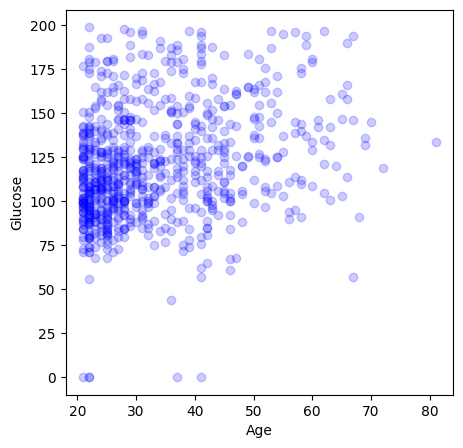

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(diab["Age"], diab["Glucose"], color='b', alpha=0.20)
ax.set_xlabel('Age')
ax.set_ylabel('Glucose')
plt.show()
plt.savefig('Age_Glucose_scatter.png')

## Statsmodel

In [10]:
import statsmodels.api as sm

# .statsmodels.api has an OLS class that allows users to run linear regression models.

In [11]:
diab["Age"] = diab["Age"] - diab["Age"].min()

In [14]:
# The following code creates a linear regression model I named smOLS with glucose concentration as the outcome and the age 
# as the predictor.

smOLS = sm.OLS(diab["Glucose"], diab["Age"])

# smOLS only contains information on the structure of our model.

In [15]:
#  So, let's overwrite smOLS with a fitted model.

smOLS = sm.OLS(diab["Glucose"], diab["Age"]).fit()

In [16]:
smOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Glucose   R-squared (uncentered):                   0.554
Model:                            OLS   Adj. R-squared (uncentered):              0.553
Method:                 Least Squares   F-statistic:                              951.1
Date:                Fri, 22 Sep 2023   Prob (F-statistic):                   1.82e-136
Time:                        08:46:25   Log-Likelihood:                         -4488.5
No. Observations:                 768   AIC:                                      8979.
Df Residuals:                     767   BIC:                                      8984.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            5.4827      0.178     30.841      0.000       5.134       5.832
==============================================================================
Omnibus:                       88.673   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.430
Skew:                          -0.894   Prob(JB):                     1.92e-26
Kurtosis:                       3.710   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a lot going on here, so I only want to focus on a few pieces of output. First, the R-squared (uncentered) has a value of 0.555. If we interpret R² as the proportion of variance in the outcome accounted for by our model, this value tells us that our model — with just one independent variable — accounts for roughly 56% of the variance in glucose levels. We will return to this point in a moment. Second, the value of 5.4827 under the coef column in the Age row provides the regression weight for our predictor, age. We can interpret this value to mean the for every year increase in age the predicted glucose concentration increases by a value of roughly 5.50. Thus, a participant whose age is one year above the minimum (i.e., age 22) is expected to have a glucose concentration that is about 5.50 units higher than a participant who is at the minimum age (i.e., age 21).

The std err, P>|t|, 0.025, and 0.975 columns provide the standard error, p-value, lower-bound of the 95% confidence interval, and upper-bound of the 95% confidence interval, respectively. The p-value of 0.000 tells us that the effect of age on glucose is statistically significant at conventional levels of significance (statistical significance is also apparent as the 95% confidence interval does not cross zero).

In [63]:
# Running dir(smOLS) provides a list of all the specific results available for smOLS.
# The dir() function in Python is used to list the names of attributes and methods of an object. In your query, you mentioned 
# dir(OLS)

dir(smOLS)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

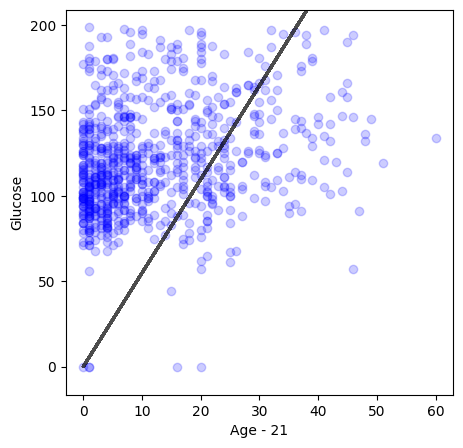

In [20]:
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(diab["Age"], diab["Glucose"], color='b', alpha=0.20)
ax.plot(diab["Age"], smOLS.predict(), color='black', alpha=0.70, linewidth=2)
ax.set_xlabel('Age - 21')
ax.set_ylabel('Glucose')
plt.ylim(top=diab['Glucose'].max()+10)
plt.savefig("lm_statsmodel_noint.png")

In [21]:
smOLS_int = sm.OLS(diab["Glucose"], sm.add_constant(diab["Age"])).fit()
smOLS_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Glucose   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     57.16
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           1.15e-13
Time:                        08:56:38   Log-Likelihood:                -3722.6
No. Observations:                 768   AIC:                             7449.
Df Residuals:                     766   BIC:                             7459.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.1249      1.608     69.729      0.000     108.968     115.282
Age            0.7164      0.095      7.560      0.000       0.530       0.902
==============================================================================
Omnibus:                       15.129   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.565
Skew:                           0.110   Prob(JB):                     2.81e-06
Kurtosis:                       3.866   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R² value in this output is 0.069, much smaller than the R² of 0.554 from the model excluding the intercept. The lesson here is that when the intercept is excluded from a linear regression model the R² is artificially inflated.

Moving to the middle of the output, we now have an additional set of results. Namely, the row labeled const , which provides the results for the intercept. The coef value of 112.1249 for const means that at the minimum age value, the predicted glucose concentration value from this model is roughly 113. The coef value of 0.6929 for Age means that with each one-year increase in age, glucose concentration is predicted to increase by a value of 0.7164. We can plug the intercept and regression weight estimates from the statsmodels output into the prediction equation for happiness.

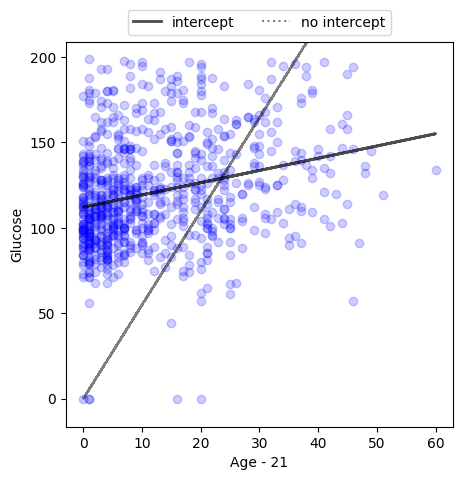

In [22]:
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(diab["Age"], diab["Glucose"], color='blue', alpha=0.20)
ax.plot(diab["Age"], smOLS_int.predict(), color='black', label="intercept", alpha=0.70, linewidth=2)
ax.plot(diab["Age"], smOLS.predict(), color='black', label="no intercept",  linestyle=":", alpha=0.50, linewidth=1.5)
ax.set_xlabel('Age - 21')
ax.set_ylabel('Glucose')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.00), shadow=False, ncol=2)
plt.ylim(top=diab['Glucose'].max()+10)
plt.savefig("lm_statsmodel_int")

Returning to the output from smOLS_int.summary(), the p-value for Age is still less than 0.001, indicating that the effect of age on glucose is statistically significant. This statistically significant result tells us that if age truly has no effect on glucose in the population from which our sample was drawn, it is improbable that we would observe an effect of age on glucose at least as large as the effect observed in our sample. In other words, based on our results, it would be very surprising if age and glucose were in fact unrelated in our population of interest. We can thus have confidence that the observed effect of age on glucose is not simply an artifact of the specific sample we have.

## scikit-learn

In [24]:
from sklearn.linear_model import LinearRegression

In [28]:
sklOLS = LinearRegression().fit(diab["Age"], diab["Glucose"])

ValueError: Expected 2D array, got 1D array instead:
array=[29 10 11  0 12  9  5  8 32 33  9 13 36 38 30 11 10 10 12 11  6 29 20  8
 30 20 22  1 36 17 39  7  1  7 24 12 14 25  6 35  5 16 27 33 19  4  8  1
 10  3  1  5  9 37 21  0 20 10 23  1  0 18 15  3 21 11 17 33  4  6  7  5
 21  2  1  1 20  6  5  3  1  1 15  1 16  6 24  5 22  3  0 13 21 39  0 19
  3  1  2 10 12  1  0  3  6  0  6 16  4  3  3 25  2  4 18 40 17  4  1  0
  4  3  2 48  2  5  9  2 19 41 12 12  9 18  5 10  0  1  8  7 34 17  1 21
  2  0 20 13 44  1  3 16 21  2 22 15  0  2  1 26 15 24  6  0 11 20  1 13
  8  8 15  8  4  2 12 15 21  5 26 16 11  2  0  6 19 20 39 12 10  4  0 19
 15 19 21  8  0  2  5  8  0  7 11  6 34  6 36 31  0 20  4  3 39  3 15 17
  4 11 11 20  0 45 16 40  5  1  5  3 10  3  1 25  1  8  2  5 30  2 11  6
  0  1  1 12  8 28 20  2 13  2 21  6  3  4 23  0  9  4  3 30 13  6  3 42
 14 22  4  3  0  7 17  0 19  0 31  4  8  2 36  1  7 18 16 26 31 30 13  8
  5 12  0  4 10  3 44  7  8  3 25 37  9  4 14  7 16  8 26  0  4  9 20  1
  6  4 22  5  9  8  7 38 10  4 15 22  0  3  9 16  2 16 25  4 20 23  1  5
 23 23 12 20  1 15  1 12 36 28  1  2  5 16  8  9 25  3  0 28  7 23 27  8
  8 42 44 46  9  9  8  0  1 24  4  0  0  4  7 37  1  1 11 14  3  1  0  4
  4  3 14 24 37  7 21  6  0 16 10  4 18  1  4  4 10 34 14 17 20  5 25  4
 18  7  7  4  1  0  0  1  1 16  6  7  5  0  0  0 15 10  4 17  5 22  2 17
  1  8 15  8 20  7  0 10 20  1  3 12  9  4  7  5  1  5  2  2  4 51  3 17
 41  3 30 60 27  5 18 16 13  0  1  4 17  6  7  1  1 29  3 38  8 10 18 42
 14  8  7  2 10  3  0 37  7 46  3 21 12 24  1 45  9  4 34 18  0  7 20 20
 19 17 14  0  0 43 25  0 37  1  3  7 32 30 20 39  4  5  5 24  3  0  0  3
  1 10  1  3  8 10  3  2 25 46  2 11 22  6 35  4  8 16 32  7 29 16  0  4
 45  2  7 16  9 37 21 14 33  7  3 11  6  1  0 25 16 12 18  0  1  1  2  4
 14  0 15 41  0  6 41 21 31  1 20  8 31  4 24  3 23  4 13  1 25  0 17  5
  3  7  9 33 15  0  1  4  6  2  3 15 19  5 29  6  9  2 29  3  7  7 24  0
  0  8  0  0 24  0 13  3  2  1 10 17 27  2 11  7  6  3 29 10  6  9 12  1
 21  2  2  6  7  6  1  4  1 20 30  6 33  1 22 19 19  3 49 19 22 24 28  0
 26  1 47 10 32  4  4  2  1  5  1  6 48  4  1  8  2 25 13 23  2 22  4 22
 10  1  7  5  5 28 31 20  6  7  9  1 24  2  3 19 17  0 11 13 10 35  3 31
 13  0 21 21 24 17  4  1  1  1 13  1  3  1 32  7  0 21  0 21 27  5  1 24
 18 25  6 11 15 29  1  7  4  5 24 16 18 31  5 45  1 22 12 42  6  9 26  2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [29]:
diab["Age"].shape 

(768,)

This output tells us that diab["Age"] has 768 rows and no columns, but we need 768 rows and one column. The solution is to convert diab["Age"] to a 2-dimensional NumPy array.

In [31]:
X = diab["Age"].to_numpy().reshape(-1, 1)

# In reshape(-1, 1) the value of -1 means that the number of rows will be inferred from the input. 
# The value of 1 specifies that the resulting shape must have a single column.

In [32]:
X.shape

(768, 1)

In [46]:
LR = LinearRegression().fit(X, diab["Glucose"])

In [47]:
intercept = LR.intercept_

# Print the intercept
print("Intercept:", intercept)

Intercept: 112.12493937668151


In [50]:
LR.coef_

array([0.7164181])

In [53]:
LR.score(X,diab["Glucose"])

0.06943979675248113

LR.intercept_ gives us a value of 113.1837 and LR.coef_ returns 0.6929, both of which align with the intercept and coefficient values from our statsmodels results in smOLS_int . score returns a value of 0.0714, which also aligns with what we obtained earlier from statsmodels.

As mentioned earlier, scikit-learn is geared toward prediction, so the end goal of modeling in scikit-learn would likely be the generation of predictions for new data points. This task can be accomplished using predict. Returning to our earlier example predicting the glucose level of individual who is 31 years old, we could use predict to generate a prediction when the input value is 10 (remember, we need to subtract the minimum age value of 21). Be sure to first import NumPy with import numpy as np to recreate the arrays I created below with np.array .

In [55]:
LR.predict(np.array([10]).reshape(-1,1))

array([119.28912038])

In [56]:
# And if we want to predict multiple values, we can just include more values in our array.

LR.predict(np.array([0,1,5,10,20]).reshape(-1,1))

array([112.12493938, 112.84135748, 115.70702988, 119.28912038,
       126.45330138])

Notice that I reshaped the arrays to be a 2-dimensional arrays because our scikit-learn model is still expecting any inputs fed to it to have both rows and at least one column.

## Training and Testing Data

If our goal is to use scikit-learn to develop high-quality predictions, then we can assess the predictive ability of our model by evaluating how well the model performs on data it has never encountered. With respect to the current case, for example, let’s say we want to assess how well our model can predict the glucose concentration of adult women of PIMA heritage.

Here, we can randomly split the available data into training and testing datasets to evaluate the predictive performance of our model. The training data is the subset of our data that is used to find the actual regression formula. This formula can then be applied to the testing data and we can examine the resulting R² to get a sense of how well the model performs on data that was not used to train the model. Thus, the testing data serves as a proxy for new data points for which age is observed and glucose is unobserved.

Our original data can be split into training and testing sets conveniently with the train_test_split function from scikit-learn. The following code uses train_test_split to return the following: a training dataset of predictor values called X_train , a testing dataset of predictor values called X_test, and training and testing datasets of outcome values called y_train and y_test , respectively.

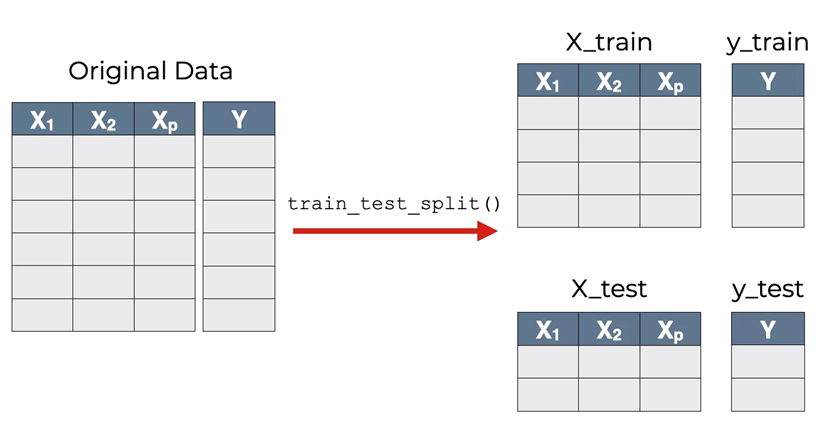

In [57]:
# Import the model train_test_split from sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, diab["Glucose"],test_size= 0.2,random_state=0)

The example shown samples 80% of the original data into the training set and 20% into the testing set. If we wanted a different split, say 10% into the testing set, we could change the value of the test_size parameter from 0.2 to 0.1. The random_state parameter sets the seed for the random generator used in train_test_split. If you set a different number for your random seed you will obtain different results due to the fact that train_test_split will randomly sample different values into the training and testing sets.

In [59]:
LR_train = LinearRegression().fit(X_train, y_train)
LR_train.score(X_train, y_train)

0.07732561001310834

We get an R² of 0.0773 which is very small then bad model.

But how well does this model perform on the testing data? We can find out by running sklOLS_train.score on the testing data.

In [61]:
LR_train.score(X_test, y_test)

0.03901096603033105

What happened? The R² from the training data was not great but the R² from testing data is even smaller. This is a case of overfitting, meaning that the model does not perform as well on new data as it does on the data that was used to fit the model.

It is worth noting that there are ways to reduce overfitting, thereby improving the generalizability of a model. For example, a resampling technique, such as k-fold cross-validation, could be used as part of the model evaluation process.

### Conclusion

statsmodels and scikit-learn are both very useful packages, but each is better suited for a different set of tasks.

statsmodels provides convenient tools for statistical hypothesis testing while the functionality provided by scikit-learn is geared toward generating models that can make useful predictions.

Accordingly, the choice of using one package over the other should be dictated by the needs of a given project.